# Analysis on European Energy and Global Carbon Emission


# 1. Introduction

Reducing carbon emission and achieving net-zero is becoming a more concerning topic globally. Following the United Nation’s goal of obtaining net-zero emission by 2050, national governments successively implemented policy in recent years. Answering the above questions will provide us with a clearer insight on how the use of renewable energy such as electricity, biofuel, solar etc. affecting the global carbon emission and are the policies introduced by different countries making effective influence.

Previous research and analysis on the topic are focused on one aspect, for instance, reporting on how renewable energy consumption lowers carbon emission, or discovering the role of governance in renewable energy and carbon emissions. In this report, we will be focusing on European countries for the analysis and proposed to build a bridge between national governments, renewable energy, and global carbon how these 3 factors are affecting each other and becoming a sustainable cycle. Accordingly, this project aims to explore relation between energy use and carbon emission, as well as identifying the bounding between carbon emission and government intervention.

### Data Description
The data used in this project comes from the following the following 3 sources:
1. List of European countries scrapped from Wikipedia
   * This data is scrapped  for the purpose of preparing country list for analysis
2. Energy activity and corresponding carbon emission data of European countries:
   * This data is generated using Climateq API, which estimates carbon emission of different fuels and energy using 2021 carbon emission data. 
3. ...

### Research Questions

1. Why is new energy a effective solution to reduce carbon emission? 
2. What are the primary impacts of national governments’ intervention on renewable energy?
3. How do changes of global carbon emission payback to national government?

# 2. Data Acquisition

## 2.1 European Country list

In [8]:
import requests
import json
import pprint
import sys
import pandas as pd
import numpy as np

To start with, I scrap the European country list froma wikipedia and generate them into ISO 3166-1 alpha-2 country codes to get prepared for data collection.

In [9]:
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/List_of_European_countries_by_area"
response = requests.get(url)

# Scrap the page with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
table = soup.find('table', class_='wikitable sortable')
rows = table.find_all('tr')

# iterate through the rows and extract the country names from the 'state' column
countries_name = []
for row in rows:
    cells = row.find_all('td')
    if len(cells) > 0:
        country = cells[1].text.replace("*", "").strip()
        countries_name.append(country)

countries_name_df = pd.DataFrame(countries_name)
countries_name_df.head()

,0
0,Russia
1,Ukraine
2,France
3,Spain
4,Sweden


In [10]:
#Transform the countries' names into ISO 3166-1 alpha-2 country codes 
#and prepared for using Climateq API
import pycountry

input_countries = countries_name

countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_2

codes = [countries.get(country, None) for country in input_countries]

print(codes)
countries_code_df = pd.DataFrame(codes)

[None, 'UA', 'FR', 'ES', 'SE', 'NO', 'DE', 'FI', 'PL', 'IT', 'GB', 'RO', 'BY', 'KZ', 'GR', 'BG', 'IS', 'HU', 'PT', 'RS', 'AT', 'CZ', 'IE', 'LT', 'LV', 'HR', 'BA', 'SK', 'EE', 'DK', 'CH', 'NL', None, 'BE', 'AL', 'MK', 'TR', 'SI', 'ME', 'AZ', 'GE', 'LU', 'AD', 'MT', 'LI', 'SM', 'MC', None, 'CY', 'AM']


In [409]:
countries = pd.concat([countries_name_df,countries_code_df], axis=1)

## 2.2 Energy and Carbon Emission data

Countries with out ISO 3166-1 alpha-2 codes cannot use climateq API to estimate so they are dropped from country list.

In [408]:
countries.dropna().head()

,0,0
1,Ukraine,UA
2,France,FR
3,Spain,ES
4,Sweden,SE
5,Norway,NO


In [12]:
import requests
import json

with open('keys.json') as f:
    keys = json.load(f)
api_key = keys['climate']['api_key']
MY_API_KEY='X4RPMAXSAX4SQ1G7A9S73YDED7J9'

In [13]:
import requests

def get_emission_factor(region):
    # Define the JSON object with the given activity_id and region
    json_body = [
        {
            "emission_factor": {
                "activity_id": "electricity-energy_source_grid_mix",
                "region": region,
            },
            "parameters": {
                "energy": 10000,
                "energy_unit": "kWh"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_nuclear_fuel-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "energy_services-type_distribution_trade_of_electricity_services",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_biodiesel-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_biogas-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_biogasoline-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_other_liquid_biofuels-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_oxygen_steel_furnace_gas-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_ethane-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_liquefied_petroleum_gases-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_blast_furnace_gas-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_coal_tar-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_coke_oven_coke-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_coke_oven_gas-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_gas_diesel_oil-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_paraffin_waxes-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        },
        {
            "emission_factor": {
                "activity_id": "fuel_type_heavy_fuel_oil-fuel_use_na",
                "region": region,
            },
            "parameters": {
                "money": 10000,
                "money_unit": "eur"
            }
        }
        
    ]

    # Define the authorization headers with your API key
    authorization_headers = {"Authorization": f"Bearer: {MY_API_KEY}"}

    # Make a POST request with the given JSON object and headers
    response = requests.post("https://beta3.api.climatiq.io/batch", json=json_body, headers=authorization_headers)
    return response.json()

# List of regions to iterate over
regions = ['UA', 'FR', 'ES', 'SE', 'NO', 'DE', 'FI', 'PL', 'IT', 'GB', 'RO', 'BY', 'KZ', 
           'GR', 'BG', 'IS', 'HU', 'PT', 'RS', 'AT', 'CZ', 'IE', 'LT', 'LV', 'HR', 'BA', 
           'SK', 'EE', 'DK', 'CH', 'NL', 'BE', 'AL', 'MK', 'TR', 'SI', 'ME', 'AZ', 'GE', 
           'LU', 'AD', 'MT', 'LI', 'SM', 'MC', 'CY', 'AM']
# List to collect the results
results = []

# Iterate over the pairs and call the API with each one
for region in regions:
    result = get_emission_factor(region)
    results.append(result)

#Create Dataframe for results
# Convert the list of dictionaries into a pandas DataFrame
energy = pd.json_normalize(results, record_path=['results'])

In [411]:
energy.head()

,co2e,co2e_unit,co2e_calculation_method,co2e_calculation_origin,emission_factor.name,emission_factor.activity_id,emission_factor.uuid,emission_factor.id,emission_factor.access_type,emission_factor.source,...,emission_factor.category,emission_factor.lca_activity,emission_factor.data_quality_flags,constituent_gases.co2e_total,constituent_gases.co2e_other,constituent_gases.co2,constituent_gases.ch4,constituent_gases.n2o,error,message
0,3920.0,kg,ar4,source,Electricity supplied from grid,electricity-energy_source_grid_mix,ada20908-7d2c-4264-8ae8-da31f5373014,electricity-energy_source_grid_mix,public,ADEME,...,Electricity,electricity_generation,[partial_factor],3920.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_found,No emission factors could be found using the c...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_found,No emission factors could be found using the c...
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_found,No emission factors could be found using the c...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,not_found,No emission factors could be found using the c...


The dataframe of fuel use activity and its corrsponding carbon emssion of the 49 countries has 799 rows and 22 columns, but it contain lots of missing value. I will clean the data in next section.

# 3. Data Preparation

### Data Cleaning

In [15]:
energy.dtypes

co2e                                  float64
co2e_unit                              object
co2e_calculation_method                object
co2e_calculation_origin                object
emission_factor.name                   object
emission_factor.activity_id            object
emission_factor.uuid                   object
emission_factor.id                     object
emission_factor.access_type            object
emission_factor.source                 object
emission_factor.year                   object
emission_factor.region                 object
emission_factor.category               object
emission_factor.lca_activity           object
emission_factor.data_quality_flags     object
constituent_gases.co2e_total          float64
constituent_gases.co2e_other          float64
constituent_gases.co2                 float64
constituent_gases.ch4                 float64
constituent_gases.n2o                 float64
error                                  object
message                           

In [16]:
energy.describe(exclude = 'object')

,co2e,constituent_gases.co2e_total,constituent_gases.co2e_other,constituent_gases.co2,constituent_gases.ch4,constituent_gases.n2o
count,407.000000,407.000000,0.0,2.000000,0.0,0.0
mean,16179.248403,16179.248403,NaN,2429.500000,NaN,NaN
std,21808.680835,21808.680835,NaN,2590.132139,NaN,NaN
min,1.000000,1.000000,NaN,598.000000,NaN,NaN
25%,4984.500000,4984.500000,NaN,1513.750000,NaN,NaN
50%,9810.000000,9810.000000,NaN,2429.500000,NaN,NaN
75%,18654.500000,18654.500000,NaN,3345.250000,NaN,NaN
max,246190.000000,246190.000000,NaN,4261.000000,NaN,NaN


In [17]:
energy.isnull()

,co2e,co2e_unit,co2e_calculation_method,co2e_calculation_origin,emission_factor.name,emission_factor.activity_id,emission_factor.uuid,emission_factor.id,emission_factor.access_type,emission_factor.source,...,emission_factor.category,emission_factor.lca_activity,emission_factor.data_quality_flags,constituent_gases.co2e_total,constituent_gases.co2e_other,constituent_gases.co2,constituent_gases.ch4,constituent_gases.n2o,error,message
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
795,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
796,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False
797,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,False


In [18]:
nan_count = energy.isna().sum()
print(nan_count)

co2e                                  392
co2e_unit                             392
co2e_calculation_method               392
co2e_calculation_origin               392
emission_factor.name                  392
emission_factor.activity_id           392
emission_factor.uuid                  392
emission_factor.id                    392
emission_factor.access_type           392
emission_factor.source                392
emission_factor.year                  392
emission_factor.region                392
emission_factor.category              392
emission_factor.lca_activity          392
emission_factor.data_quality_flags    392
constituent_gases.co2e_total          392
constituent_gases.co2e_other          799
constituent_gases.co2                 797
constituent_gases.ch4                 799
constituent_gases.n2o                 799
error                                 407
message                               407
dtype: int64


From the result above, it can be seen that most of costituent gases donot have valid estimated data. Since the purpose of this report is to analyse carbon emission, we will only be focused on co2e data and drop constitutent gases collumns except ``constituent_gases.co2e_total``. Additionally, ``co2e_calculation_method``,``co2e_calculation_origin``,``emission_factor.uuid``,``emission_factor.source``, ``emission_factor.data_quality_flags``, ``error`` and ``message`` columns are not useful for the analysis, we will drop them as well. 

In [19]:
energy_no_na = energy[energy['co2e'].notna()] #Drop people who did not complete the survey
energy_new=energy_no_na.drop(['co2e_calculation_method','co2e_calculation_origin','emission_factor.uuid','emission_factor.source','emission_factor.data_quality_flags','constituent_gases.co2e_other', 'constituent_gases.co2', 'constituent_gases.ch4', 'constituent_gases.n2o', 'error','message'],axis=1)
energy_new

,co2e,co2e_unit,emission_factor.name,emission_factor.activity_id,emission_factor.id,emission_factor.access_type,emission_factor.year,emission_factor.region,emission_factor.category,emission_factor.lca_activity,constituent_gases.co2e_total
0,3920.0,kg,Electricity supplied from grid,electricity-energy_source_grid_mix,electricity-energy_source_grid_mix,public,2021,UA,Electricity,electricity_generation,3920.0
17,598.0,kg,Electricity supplied from grid,electricity-energy_source_grid_mix,electricity-energy_source_grid_mix,public,2022,FR,Electricity,electricity_generation,598.0
18,2777.0,kg,Nuclear fuel,fuel_type_nuclear_fuel-fuel_use_na,fuel_type_nuclear_fuel-fuel_use_na,public,2021,FR,Fuel,unknown,2777.0
19,7404.0,kg,Distribution and trade of electricity (services),energy_services-type_distribution_trade_of_ele...,energy_services-type_distribution_trade_of_ele...,public,2021,FR,Energy Services,unknown,7404.0
20,4033.0,kg,Biodiesels,fuel_type_biodiesel-fuel_use_na,fuel_type_biodiesel-fuel_use_na,public,2021,FR,Fuel,unknown,4033.0
...,...,...,...,...,...,...,...,...,...,...,...
777,64638.0,kg,Coke oven coke,fuel_type_coke_oven_coke-fuel_use_na,fuel_type_coke_oven_coke-fuel_use_na,public,2021,CY,Fuel,unknown,64638.0
779,18596.0,kg,Gas/diesel oil,fuel_type_gas_diesel_oil-fuel_use_na,fuel_type_gas_diesel_oil-fuel_use_na,public,2021,CY,Fuel,unknown,18596.0
780,39150.0,kg,Paraffin waxes,fuel_type_paraffin_waxes-fuel_use_na,fuel_type_paraffin_waxes-fuel_use_na,public,2021,CY,Fuel,unknown,39150.0
781,13185.0,kg,Heavy fuel oil,fuel_type_heavy_fuel_oil-fuel_use_na,fuel_type_heavy_fuel_oil-fuel_use_na,public,2021,CY,Fuel,unknown,13185.0


In [20]:
energy_new.isnull().sum()

co2e                            0
co2e_unit                       0
emission_factor.name            0
emission_factor.activity_id     0
emission_factor.id              0
emission_factor.access_type     0
emission_factor.year            0
emission_factor.region          0
emission_factor.category        0
emission_factor.lca_activity    0
constituent_gases.co2e_total    0
dtype: int64

In [21]:
energy_new.describe()

,co2e,constituent_gases.co2e_total
count,407.000000,407.000000
mean,16179.248403,16179.248403
std,21808.680835,21808.680835
min,1.000000,1.000000
25%,4984.500000,4984.500000
50%,9810.000000,9810.000000
75%,18654.500000,18654.500000
max,246190.000000,246190.000000


### Data Reshaping

In [22]:
# Pivot the DataFrame to create the desired table
energy_df = energy.pivot_table(index='emission_factor.region', columns='emission_factor.activity_id', values='co2e')
print(energy_df)

emission_factor.activity_id  electricity-energy_source_grid_mix  \
emission_factor.region                                            
AL                                                        150.0   
AM                                                        922.0   
AT                                                       1184.7   
AZ                                                       4390.0   
BA                                                       5585.2   
BE                                                       1226.4   
BG                                                       4041.2   
BY                                                       4490.0   
CH                                                        116.3   
CY                                                       6229.6   
CZ                                                       5067.1   
DE                                                       3776.4   
DK                                                       1813.

# 4. Data Analysis

## Q1: Is new energy a effective solution to reduce carbon emission?

In this section, I will compare the carbon emission of energy activities in European countries and classify energy type with country specific analysis.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

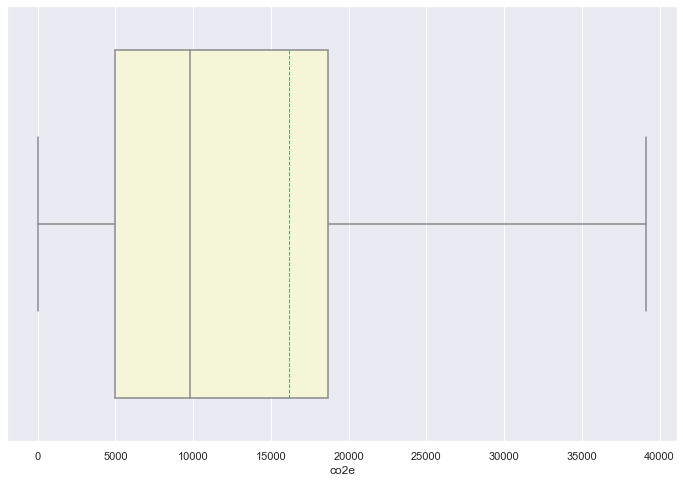

In [433]:
sns.set(style='darkgrid')
graph=sns.boxplot(x=energy_new['co2e'],color='lightgoldenrodyellow',showmeans=True, meanline=True,showfliers=False);

In [434]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(17, rot=-.25, light=.7)
g = sns.FacetGrid(energy_new, row=energy_new['co2e'], hue=energy_new['emission_factor.activity_id'], aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, energy_new['co2e'],
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

KeyError: "None of [Index(['electricity-energy_source_grid_mix',\n       'electricity-energy_source_grid_mix',\n       'fuel_type_nuclear_fuel-fuel_use_na',\n       'energy_services-type_distribution_trade_of_electricity_services',\n       'fuel_type_biodiesel-fuel_use_na', 'fuel_type_biogas-fuel_use_na',\n       'fuel_type_biogasoline-fuel_use_na',\n       'fuel_type_oxygen_steel_furnace_gas-fuel_use_na',\n       'fuel_type_blast_furnace_gas-fuel_use_na',\n       'fuel_type_coke_oven_gas-fuel_use_na',\n       ...\n       'fuel_type_biogasoline-fuel_use_na',\n       'fuel_type_other_liquid_biofuels-fuel_use_na',\n       'fuel_type_ethane-fuel_use_na',\n       'fuel_type_liquefied_petroleum_gases-fuel_use_na',\n       'fuel_type_coal_tar-fuel_use_na',\n       'fuel_type_coke_oven_coke-fuel_use_na',\n       'fuel_type_gas_diesel_oil-fuel_use_na',\n       'fuel_type_paraffin_waxes-fuel_use_na',\n       'fuel_type_heavy_fuel_oil-fuel_use_na',\n       'electricity-energy_source_grid_mix'],\n      dtype='object', length=407)] are in the [columns]"

In [435]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(17, rot=-.25, light=.7)
g = sns.FacetGrid(energy_new, row=energy_new['emission_factor.activity_id'], hue=energy_new['emission_factor.activity_id'], aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, energy_new['emission_factor'], bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, energy_new['emission_factor'], clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "energy_new['emission_factor']")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)


KeyError: "None of [Index(['electricity-energy_source_grid_mix',\n       'electricity-energy_source_grid_mix',\n       'fuel_type_nuclear_fuel-fuel_use_na',\n       'energy_services-type_distribution_trade_of_electricity_services',\n       'fuel_type_biodiesel-fuel_use_na', 'fuel_type_biogas-fuel_use_na',\n       'fuel_type_biogasoline-fuel_use_na',\n       'fuel_type_oxygen_steel_furnace_gas-fuel_use_na',\n       'fuel_type_blast_furnace_gas-fuel_use_na',\n       'fuel_type_coke_oven_gas-fuel_use_na',\n       ...\n       'fuel_type_biogasoline-fuel_use_na',\n       'fuel_type_other_liquid_biofuels-fuel_use_na',\n       'fuel_type_ethane-fuel_use_na',\n       'fuel_type_liquefied_petroleum_gases-fuel_use_na',\n       'fuel_type_coal_tar-fuel_use_na',\n       'fuel_type_coke_oven_coke-fuel_use_na',\n       'fuel_type_gas_diesel_oil-fuel_use_na',\n       'fuel_type_paraffin_waxes-fuel_use_na',\n       'fuel_type_heavy_fuel_oil-fuel_use_na',\n       'electricity-energy_source_grid_mix'],\n      dtype='object', length=407)] are in the [columns]"

According to the boxplot of CO2 emission, it can be discovered that every 10,000 EUR consumption of fuels will lead to an average of 16179 kg carbon emission and median around 9800kg. For the purpose of understand which energy type have highest carbon emission, I examined the carbon emission (kg) of different fuels using bar chart.

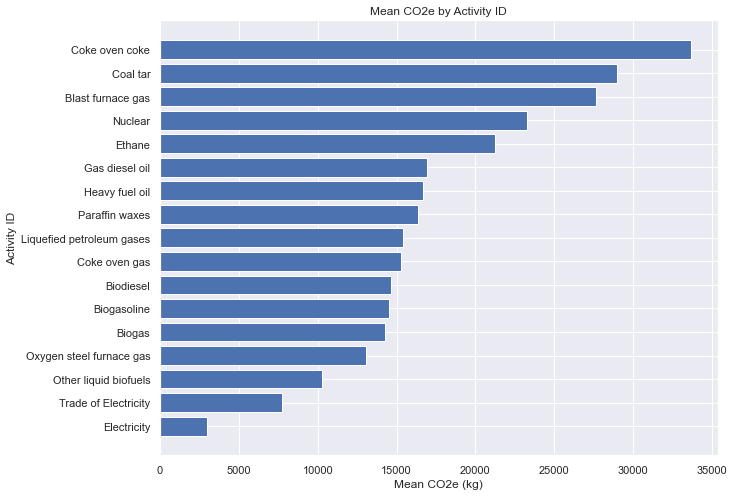

In [438]:
# Calculate the mean of 'co2e' for each activity
mean_co2e_by_activity = energy_new.groupby('emission_factor.activity_id')['co2e'].mean()

mean_co2e_by_activity = mean_co2e_by_activity.sort_values() # Sort by the mean values

fig, ax = plt.subplots(figsize=(10,8))
ax.barh(mean_co2e_by_activity.index, mean_co2e_by_activity.values)

# Rename the y-axis tick labels
y_tick_labels = ['Electricity', 'Trade of Electricity','Other liquid biofuels','Oxygen steel furnace gas', 'Biogas',
                 'Biogasoline','Biodiesel', 'Coke oven gas','Liquefied petroleum gases','Paraffin waxes', 'Heavy fuel oil',
                 'Gas diesel oil', 'Ethane','Nuclear', 'Blast furnace gas','Coal tar', 'Coke oven coke']
ax.set_yticks(range(len(y_tick_labels)))
ax.set_yticklabels(y_tick_labels)

ax.set_xlabel('Mean CO2e (kg)')
ax.set_ylabel('Activity ID')
ax.set_title('Mean CO2e by Activity ID')
plt.show()

It can be seen from the bar plot above that ``Electricity`` have lowest carbon emission, while ``Coke oven coke`` have the highest, which is almost 12 times than ``Electricity`` when comsuming 10,000 EUR. ``Trade of Electricity``, ``Other liquid biofules`` and ``Oxygen steel furnace gas`` also have very low carbon emission, with ``Biogas``, ``Biogasoline``, ``Biodisesel`` having similar mean CO2 emission and ranking after them. The following graphs will present more contries specific information.

According to the definition, new energy refers to alternative energy source other than fossil fuels, including renewable energy such as biofuels and nuclear power. Now I will classify the above fuels use activities and conduct further analysis.

| Energy Type           | Definition                                            | Classification             | 
|:---------------------|:------------------------------------------------------------:|:--------------------------:|
| New Energy           | Energy ontained from renewable resources </br>that refill overtime|         Electricity, Trade of Electricity, Other liquid biofuels, </br> Oxygen steel furnace gas, Biogas, Biogasoline, Biodiesel, Ethane, Nuclear |
| Fossil fuels         |    Hydrocarbon containing material formed naturally </br>in the Earth's crust from the </br>remains of dead creatures, </br>extracted and burned as a fuel | Coke oven gas, Liquefied petroleum gases, </br>Paraffin waxes, Heavy fuel oil, </br>Gas diesel oil, Blast furnace gas, Coal tar, Coke oven coke| 

I split the the initial dataframe into 2 sub dataframes of different energy types (one for new energy and one for fossil fuels) and generate a new dataframe containing classification for further analysis.

In [294]:
# Generate data subset for New energy
new_data = energy_new[(energy_new['emission_factor.activity_id'] == 'electricity-energy_source_grid_mix') |
                  (energy_new['emission_factor.activity_id'] == 'energy_services-type_distribution_trade_of_electricity_services') |
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_other_liquid_biofuels-fuel_use_na')|
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_oxygen_steel_furnace_gas-fuel_use_na')|
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_biogas-fuel_use_na')|
                  (energy_new['emission_factor.activity_id'] == 'fuel_type_biogasoline-fuel_use_na')|
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_biodiesel-fuel_use_na')|
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_nuclear_fuel-fuel_use_na')|
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_ethane-fuel_use_na')][['emission_factor.activity_id', 'emission_factor.region', 'co2e']]
new_data['classification'] = 'New energy'
# Generate data subset for Fossil fuels
fos_data = energy_new[(energy_new['emission_factor.activity_id'] == 'fuel_type_liquefied_petroleum_gases-fuel_use_na') |
                  (energy_new['emission_factor.activity_id'] == 'fuel_type_blast_furnace_gas-fuel_use_na') |
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_coal_tar-fuel_use_na')|
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_coke_oven_coke-fuel_use_na')|
                  (energy_new['emission_factor.activity_id'] == 'fuel_type_coke_oven_gas-fuel_use_na')|
                 (energy_new['emission_factor.activity_id'] == 'fuel_type_paraffin_waxes-fuel_use_na')|
                (energy_new['emission_factor.activity_id'] == 'fuel_type_heavy_fuel_oil-fuel_use_na') |
                (energy_new['emission_factor.activity_id'] == 'fuel_type_gas_diesel_oil-fuel_use_na')][['emission_factor.activity_id', 'emission_factor.region', 'co2e']]
fos_data['classification'] = 'Fossil fuels'
df = pd.concat([new_data, fos_data], ignore_index=True)
df.head()

,emission_factor.activity_id,emission_factor.region,co2e,classification
0,electricity-energy_source_grid_mix,UA,3920.0,New energy
1,electricity-energy_source_grid_mix,FR,598.0,New energy
2,fuel_type_nuclear_fuel-fuel_use_na,FR,2777.0,New energy
3,energy_services-type_distribution_trade_of_ele...,FR,7404.0,New energy
4,fuel_type_biodiesel-fuel_use_na,FR,4033.0,New energy


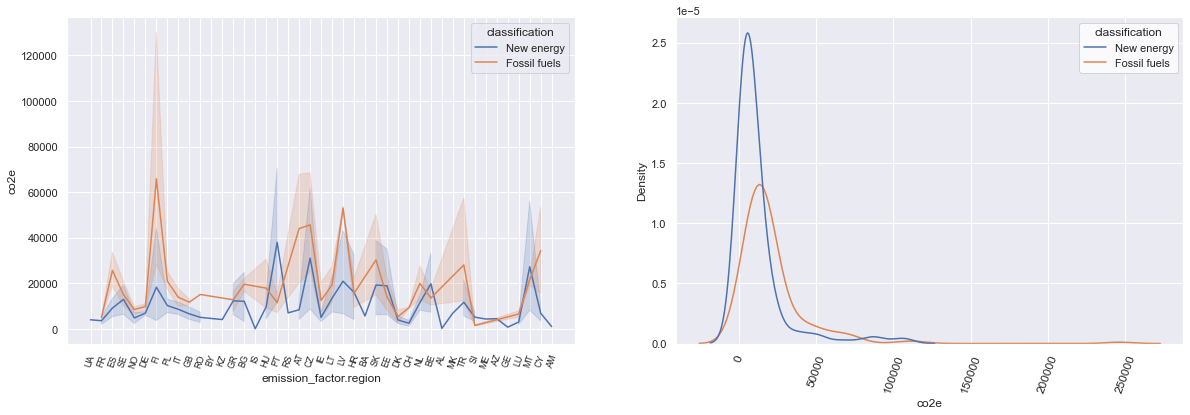

In [260]:
fig = plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1) # line plot
sns.lineplot(data=df, hue='classification', y='co2e', x='emission_factor.region')
plt.xticks(rotation=70, size=9)
plt.subplot(1, 2, 2) # kde plot
sns.set_theme(style="whitegrid")
sns.kdeplot(data=df, hue='classification', x='co2e')
plt.xticks(rotation=70, size=12)

plt.show()

The first graph illustrates that new energy and fossil fuels have quite clear classificatoin regarding CO2 emission under same money units. New energy carbon emission is tended to be lower, but the results are country dependent and variant, which will be discussed more specifically later. The inerpretation of the second plot is quite straightforwar, we can see that the carbon emission of new energy carbon emission is lower compared to fossil fuels.

In [262]:
new_data_mean = new_data.groupby('emission_factor.region').mean()
fos_data_mean = fos_data.groupby('emission_factor.region').mean()
new_regions = new_data_mean.sort_values('co2e', ascending=False).head(6)
fos_regions = fos_data_mean.sort_values('co2e', ascending=False).head(10)
new1=pd.merge(new_regions, pivot_new, on='emission_factor.region')
new = new1.drop('co2e', axis=1)
fos1=pd.merge(fos_regions, pivot_fos, on='emission_factor.region')
fos = fos1.drop('co2e', axis=1)

/var/folders/ps/hj9_g5v55z3g14rlkfcjm6rc0000gn/T/ipykernel_1070/1132103362.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_tick_labels, rotation=15, ha='right')


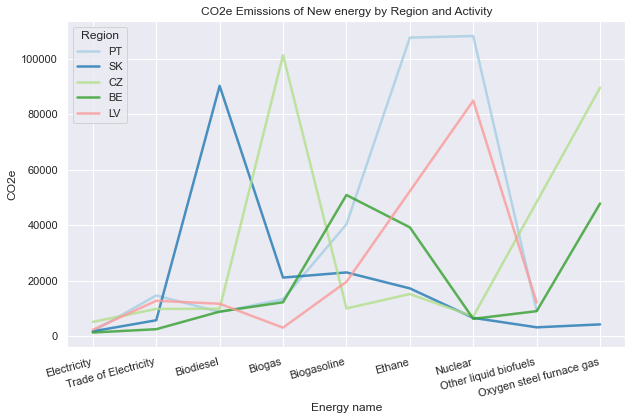

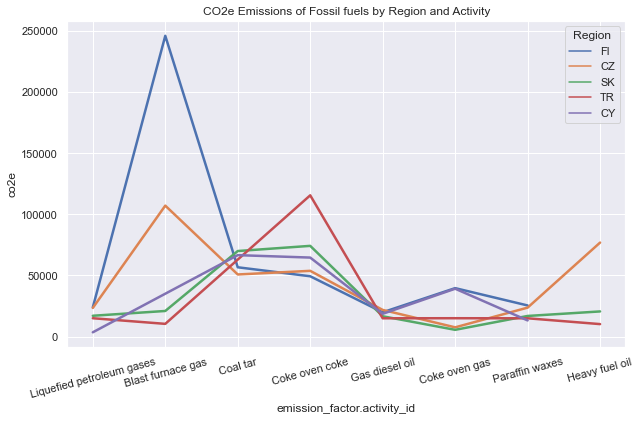

In [437]:
import matplotlib.pyplot as plt
# New energy plot
regions = ['PT', 'SK', 'CZ', 'BE', 'LV']
activities = ['electricity-energy_source_grid_mix', 'energy_services-type_distribution_trade_of_electricity_services',
              'fuel_type_other_liquid_biofuels-fuel_use_na', 'fuel_type_oxygen_steel_furnace_gas-fuel_use_na',
              'fuel_type_biogas-fuel_use_na', 'fuel_type_biogasoline-fuel_use_na',
              'fuel_type_biodiesel-fuel_use_na', 'fuel_type_nuclear_fuel-fuel_use_na', 'fuel_type_ethane-fuel_use_na']
new_data = energy_new[(energy_new['emission_factor.activity_id'].isin(activities)) &
                      (energy_new['emission_factor.region'].isin(regions))].dropna()
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(10, 6))

for region in regions:
    region_data = new_data[new_data['emission_factor.region'] == region].sort_values(by='emission_factor.activity_id')
    x = region_data['emission_factor.activity_id']
    y = region_data['co2e']
    plt.plot(x, y, color=sns.color_palette("Paired")[regions.index(region)], label=region, alpha=0.8, lw=2.5)

ax.set_xlabel('Energy name')
ax.set_ylabel('CO2e')
x_tick_labels=['Electricity', 'Trade of Electricity','Biodiesel', 'Biogas','Biogasoline', 'Ethane','Nuclear', 'Other liquid biofuels','Oxygen steel furnace gas']
ax.set_xticklabels(x_tick_labels, rotation=15, ha='right')
ax.set_xticks(range(len(x_tick_labels)))
plt.title('CO2e Emissions of New energy by Region and Activity')

plt.legend(loc='upper left', title='Region')

plt.show();

# Fossil fuel plot
selected_regions1 = ['CZ', 'TR', 'SK', 'CY', 'FI']
activities1 = ['fuel_type_liquefied_petroleum_gases-fuel_use_na','fuel_type_blast_furnace_gas-fuel_use_na',
              'fuel_type_coal_tar-fuel_use_na','fuel_type_coke_oven_coke-fuel_use_na',
              'fuel_type_coke_oven_gas-fuel_use_na', 'fuel_type_paraffin_waxes-fuel_use_na',
              'fuel_type_heavy_fuel_oil-fuel_use_na', 'fuel_type_gas_diesel_oil-fuel_use_na']
fos_data = energy_new[(energy_new['emission_factor.region'].isin(selected_regions1)).dropna() &
                      (energy_new['emission_factor.activity_id'].isin(activities1))]


sns.set(style='darkgrid')
fig, ax2 = plt.subplots(figsize=(10, 6))
sns.lineplot(x='emission_factor.activity_id', y='co2e', hue='emission_factor.region', data=fos_data, lw=2.5)

plt.legend(title='Region', loc='upper right')
x_tick_labels = ['Liquefied petroleum gases','Blast furnace gas','Coal tar','Coke oven coke','Gas diesel oil','Coke oven gas','Paraffin waxes', 'Heavy fuel oil']
ax2.set_xticks(range(len(x_tick_labels)))
ax2.set_xticklabels(x_tick_labels)
plt.title('CO2e Emissions of Fossil fuels by Region and Activity')
plt.xticks(rotation=15)
plt.show()
plt.tight_layout;

Other than the fact that fossile fuels have much higher carbon emission (almost twice than new energy) discovered in the previous part. If we go more details, we can find that emission activity for different European countries have quite different value. For example, for new energy biofuels and biogas, it has lower carbon emission in Germany but higher in Czechia, so Germany should be tended to produce more biofuels than Czechia. For fossil fuels, coal and coke discharge lots of carbon dioxide in Cyprus, so the country is tended to produce more thermal energy to reduce the use. It is also noticiable that Finland has extremely carbon emission for blast furnace gas, which is 250,000 kg per 10,000 EUR consumption. So the country is assumed to be taking actions to deal with the situation.

These findings and assumptions will be related and examined with what we will discuss in question 2, in which we will discuss the new energy production in different european countries.

Overall, it can be said that use new energy in place of fossil fuels is an effective solution to reduce carbon emission for European countries.

# 5. Conclusion

### Reference